# Insurence price prediction
This project is to allows a person to get an idea about the
necessary amount required according to their own health status. Later they
can comply with any health insurance company and their schemes &
benefits keeping in mind the predicted amount from our project

# The Attributess include:
Age: age of the person

Sex: Gender of the person [Male,Female]

Bmi:Bmi of the person

Smoker:whether the person is smoker or not [yes,no]

Region:region the person[southeast,
southwest,
northwest,
northeast]

Charges:charges for the person

# Importing Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#loading the data

data=pd.read_csv("C:/Users/DELL LYF/Documents/insurance.csv")

In [3]:
#inspecting the first 5 rows

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:


#last 5 rows

data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
#checking the  number of missing values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#getting some information about the data set

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#checking the number of rows and columns

data.shape

(1338, 7)

In [8]:
#describing the dataset

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Visualization

<Axes: xlabel='age', ylabel='charges'>

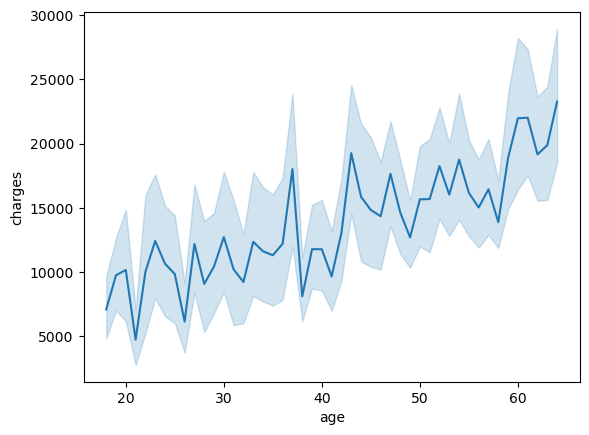

In [9]:
#Visualization for charges and age
sns.lineplot(data=data,x='age',y='charges')

C:\Users\DELL LYF\AppData\Local\Temp\ipykernel_8208\3303687566.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


<Axes: xlabel='charges', ylabel='Density'>

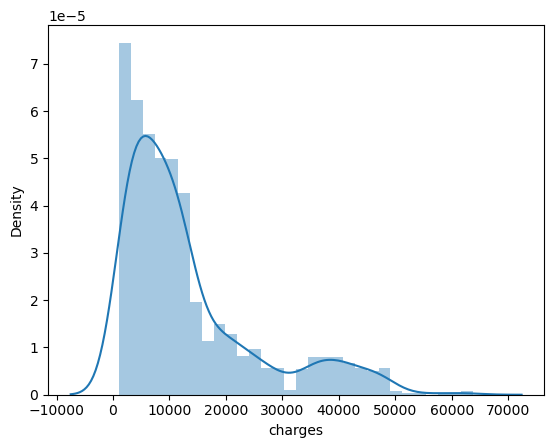

In [10]:
sns.distplot(data['charges'])

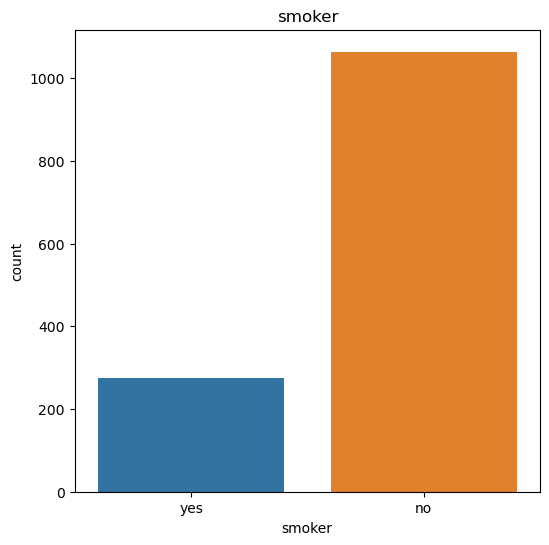

In [11]:
# Visualization between smoker and count
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=data)
plt.title('smoker')
plt.show()

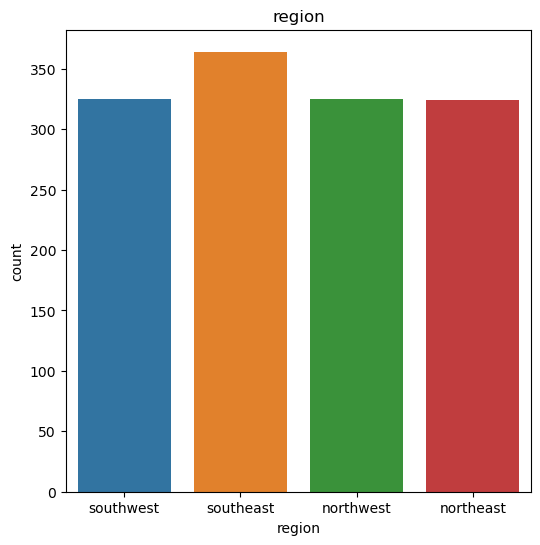

In [12]:
#Visualization between region and count
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=data)
plt.title('region')
plt.show()

In [13]:
#counts of region
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

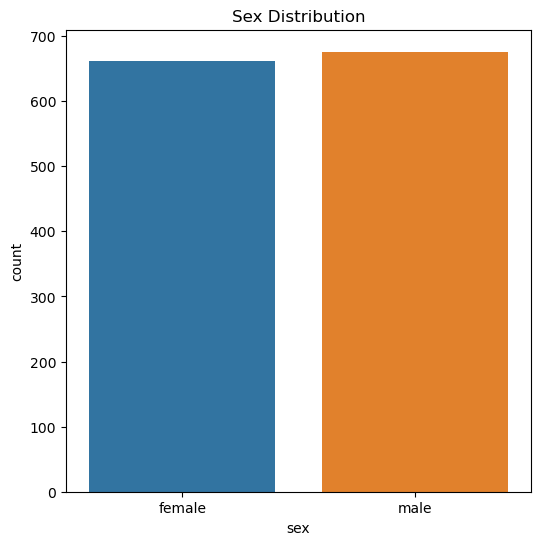

In [14]:

#Visualization between sex distribution and count
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=data)
plt.title('Sex Distribution')
plt.show()

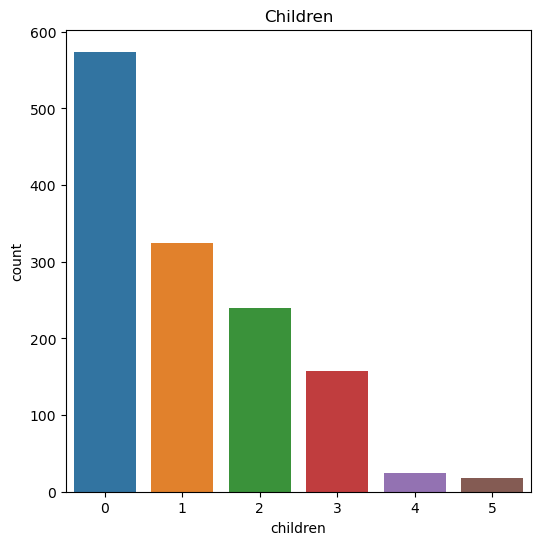

In [15]:
#Visualization of children count
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=data)
plt.title('Children')
plt.show()

In [16]:

#children counts
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [17]:
#male ,female counts
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [18]:
#encoding
data.replace({'sex':{'male':0,'female':1}},inplace=True)
data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [19]:


data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# spliting the data

In [20]:

x=data[['sex','smoker','region']]
y=data['charges']

In [21]:
x

,sex,smoker,region
0,1,0,1
1,0,1,0
2,0,1,0
3,0,1,3
4,0,1,3
...,...,...,...
1333,0,1,3
1334,1,1,2
1335,1,1,0
1336,1,1,1


In [22]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Test-Train Split

In [23]:
#spliting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
x_test

,sex,smoker,region
578,0,1,1
610,1,1,0
569,0,0,3
1034,0,1,3
198,1,1,3
...,...,...,...
1261,0,1,1
494,0,0,1
97,0,1,0
418,0,1,0


In [25]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1261     3277.16100
494     17942.10600
97      10226.28420
418     14418.28040
920     13451.12200
Name: charges, Length: 402, dtype: float64

# Linear Regression
Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between a dependent variable and one or more independent features.

In [26]:
ln=LinearRegression()

In [27]:
# Training data is used for model building
ln.fit(x_train,y_train)

LinearRegression()

In [28]:
#testing data used for prediction
predicted_test=ln.predict(x_test)

In [29]:
predicted_test

array([ 8712.73575463,  8958.27931412, 30967.52320772,  8255.84752393,
        8272.94696806,  8484.29163928,  8501.39108342,  8272.94696806,
        8272.94696806,  8255.84752393,  8501.39108342,  8272.94696806,
        8729.83519877,  8958.27931412, 30967.52320772,  8958.27931412,
        8255.84752393,  8484.29163928,  8255.84752393, 31195.96732307,
       30967.52320772,  8272.94696806,  8501.39108342, 31669.95499791,
        8941.17986999,  8484.29163928,  8501.39108342,  8958.27931412,
        8958.27931412,  8255.84752393,  8272.94696806, 31652.85555377,
        8712.73575463,  8712.73575463, 31213.06676721,  8501.39108342,
        8941.17986999, 31424.41143842, 30984.62265185,  8729.83519877,
        8501.39108342,  8941.17986999, 31195.96732307, 30967.52320772,
       31669.95499791,  8272.94696806,  8958.27931412,  8255.84752393,
        8501.39108342,  8958.27931412,  8501.39108342,  8272.94696806,
       31424.41143842, 31213.06676721,  8958.27931412,  8484.29163928,
      

In [30]:

y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1261     3277.16100
494     17942.10600
97      10226.28420
418     14418.28040
920     13451.12200
Name: charges, Length: 402, dtype: float64

# accuracy

In [31]:
#importing linbrary for calculating accuracy
from sklearn.metrics import mean_squared_error,r2_score

In [32]:
accuracy=r2_score(y_test,predicted_test)

In [33]:
accuracy

0.6709018281016002

In [34]:
mean=mean_squared_error(y_test,predicted_test)

In [35]:
mean

52481109.44118427

#  Decision tree
A decision tree is a non-parametric supervised learning algorithm for classification and regression tasks. It has a hierarchical tree structure consisting of a root node, branches, internal nodes, and leaf nodes. Decision trees are used for classification and regression tasks, providing easy-to-understand models

In [36]:
x

,sex,smoker,region
0,1,0,1
1,0,1,0
2,0,1,0
3,0,1,3
4,0,1,3
...,...,...,...
1333,0,1,3
1334,1,1,2
1335,1,1,0
1336,1,1,1


In [37]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [38]:
#spliting the data
x1train,x1test,y1train,y1test=train_test_split(x,y,test_size=0.3,random_state=40)

In [39]:
#importing the library  decisiontreeregressor
from sklearn.tree  import DecisionTreeRegressor

In [40]:
dc=DecisionTreeRegressor()

In [41]:
dc.fit(x1train,y1train)

DecisionTreeRegressor()

In [42]:

prd1=dc.predict(x1test)

In [43]:
prd1

array([ 9324.98813389, 37372.39548541,  8085.45131969,  8101.14012   ,
       27569.5364619 ,  9241.95021121,  9241.95021121, 31823.39325   ,
        7398.49759589, 30922.30645955, 32277.350556  ,  8101.14012   ,
        8652.23152391,  8027.08319585,  8085.45131969,  8027.08319585,
        8101.14012   , 27569.5364619 , 31048.20014885,  8652.23152391,
        9324.98813389,  8085.45131969,  8101.14012   , 37372.39548541,
        8085.45131969, 31823.39325   ,  8444.56073815,  8101.14012   ,
        7398.49759589,  7398.49759589, 27569.5364619 ,  8444.56073815,
       30839.42628444, 30839.42628444, 31823.39325   ,  9241.95021121,
        8085.45131969,  8085.45131969,  7398.49759589,  7398.49759589,
        8085.45131969,  8027.08319585,  8101.14012   ,  9241.95021121,
        8085.45131969,  8652.23152391,  9241.95021121, 30922.30645955,
        8027.08319585,  8444.56073815,  8101.14012   , 31048.20014885,
        8027.08319585,  8652.23152391,  8444.56073815,  8652.23152391,
      

In [44]:
y1test

1099     3227.12110
759     36307.79830
215      7371.77200
903      8125.78450
989     14571.89080
           ...     
571      2219.44510
164      5028.14660
331     24393.62240
1253    15828.82173
426      6555.07035
Name: charges, Length: 402, dtype: float64

In [45]:
accuracy1=r2_score(y1test,prd1)

In [46]:
accuracy1

0.584401003815038

In [47]:
mean1=mean_squared_error(y_test,prd1)

In [48]:
mean1

261802642.74281287

# random forest
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [49]:
x

,sex,smoker,region
0,1,0,1
1,0,1,0
2,0,1,0
3,0,1,3
4,0,1,3
...,...,...,...
1333,0,1,3
1334,1,1,2
1335,1,1,0
1336,1,1,1


In [50]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [51]:
#importing the library
from sklearn.ensemble import RandomForestRegressor

In [52]:
#spliting the data
x2train,x2test,y2train,y2test=train_test_split(x,y,test_size=0.3,random_state=45)

In [53]:
rd=RandomForestRegressor(n_estimators=40)

In [54]:
rd.fit(x2train,y2train)

RandomForestRegressor(n_estimators=40)

In [55]:
prd2=rd.predict(x2test)

In [56]:
prd2

array([ 8108.70964433,  8079.21036309, 31580.44694047,  8108.70964433,
        8207.39473454,  9902.75384458,  9902.75384458,  7571.49453405,
        8207.39473454, 33192.88068068,  9902.75384458,  9902.75384458,
        8207.39473454,  8346.82227579,  8346.82227579,  7571.49453405,
        8108.70964433,  9902.75384458,  7571.49453405,  7369.41699531,
        8346.82227579, 26372.66859053,  9902.75384458, 31580.44694047,
        7571.49453405,  8346.82227579, 37566.09812017,  9902.75384458,
        9149.03384589,  9902.75384458,  8079.21036309,  8108.70964433,
        8207.39473454,  8108.70964433,  8207.39473454,  9902.75384458,
        7369.41699531,  9149.03384589, 31580.44694047,  8079.21036309,
       32787.43016766,  9902.75384458,  9149.03384589,  8207.39473454,
        8346.82227579,  7571.49453405,  7369.41699531,  9149.03384589,
        8346.82227579,  9149.03384589,  8346.82227579, 26372.66859053,
        9902.75384458,  8108.70964433,  7369.41699531,  9149.03384589,
      

In [57]:
#finding the accuracy
accuracy2=r2_score(y2test,prd2)

In [58]:
accuracy2

0.5350260797020803

In [59]:
mean2=mean_squared_error(y2test,prd2)

In [60]:
mean2

56987554.4937551